# Carga e Análise Eploratória Dos Dados.

In [1]:
# Importando as bibliotecas necessarias para o treinamento da ML com ou sem pipeline.

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error # bibliotecas matematicas que podem ser utilizadas para calculo de métricas e etc.
from sklearn.model_selection import train_test_split # utilizado para fazer a separação do modelo de teste e o modelo de produção.
from math import sqrt # bibliotecas matematicas que podem ser utilizadas para calculo de métricas e etc.
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # utilizando para a geração dos graficos.
import pandas as pd # utilizada para analise de dados.

In [2]:
# Importando o conjunto de dados referente aos preços das casas na california nos estados unidos.
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
# vizualizando as chaves do conjunto de dados e as informações contidas neles.
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
# criando o dataframe apenas com a parte de Data do dataset com sues respectivas colunas.
california_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(california_df.head(10))

# retornando um dataFrame com as seguintes informações MedInc (receita media), HouseAge (idade media das casa);
# AveRooms (media de comodos), AveBedrms (media de quartos), Population (população local), AveOccup (media ocupacional);
# e as cordenadas geograficas.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
8    -122.26  
9    -122.25 

In [5]:
# visão geral das informações.
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
# informações gerais do dataframe gerado, quantidade de amostras, colunas, tipos das colunas etc.
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
# utilizando a bibliotecao train_test_split para separar os dados entre os eixos x e y.

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=31)

In [8]:
# verificando o alvo da predição, no caso a media do valor das casas na california.
dataset.target_names

['MedHouseVal']

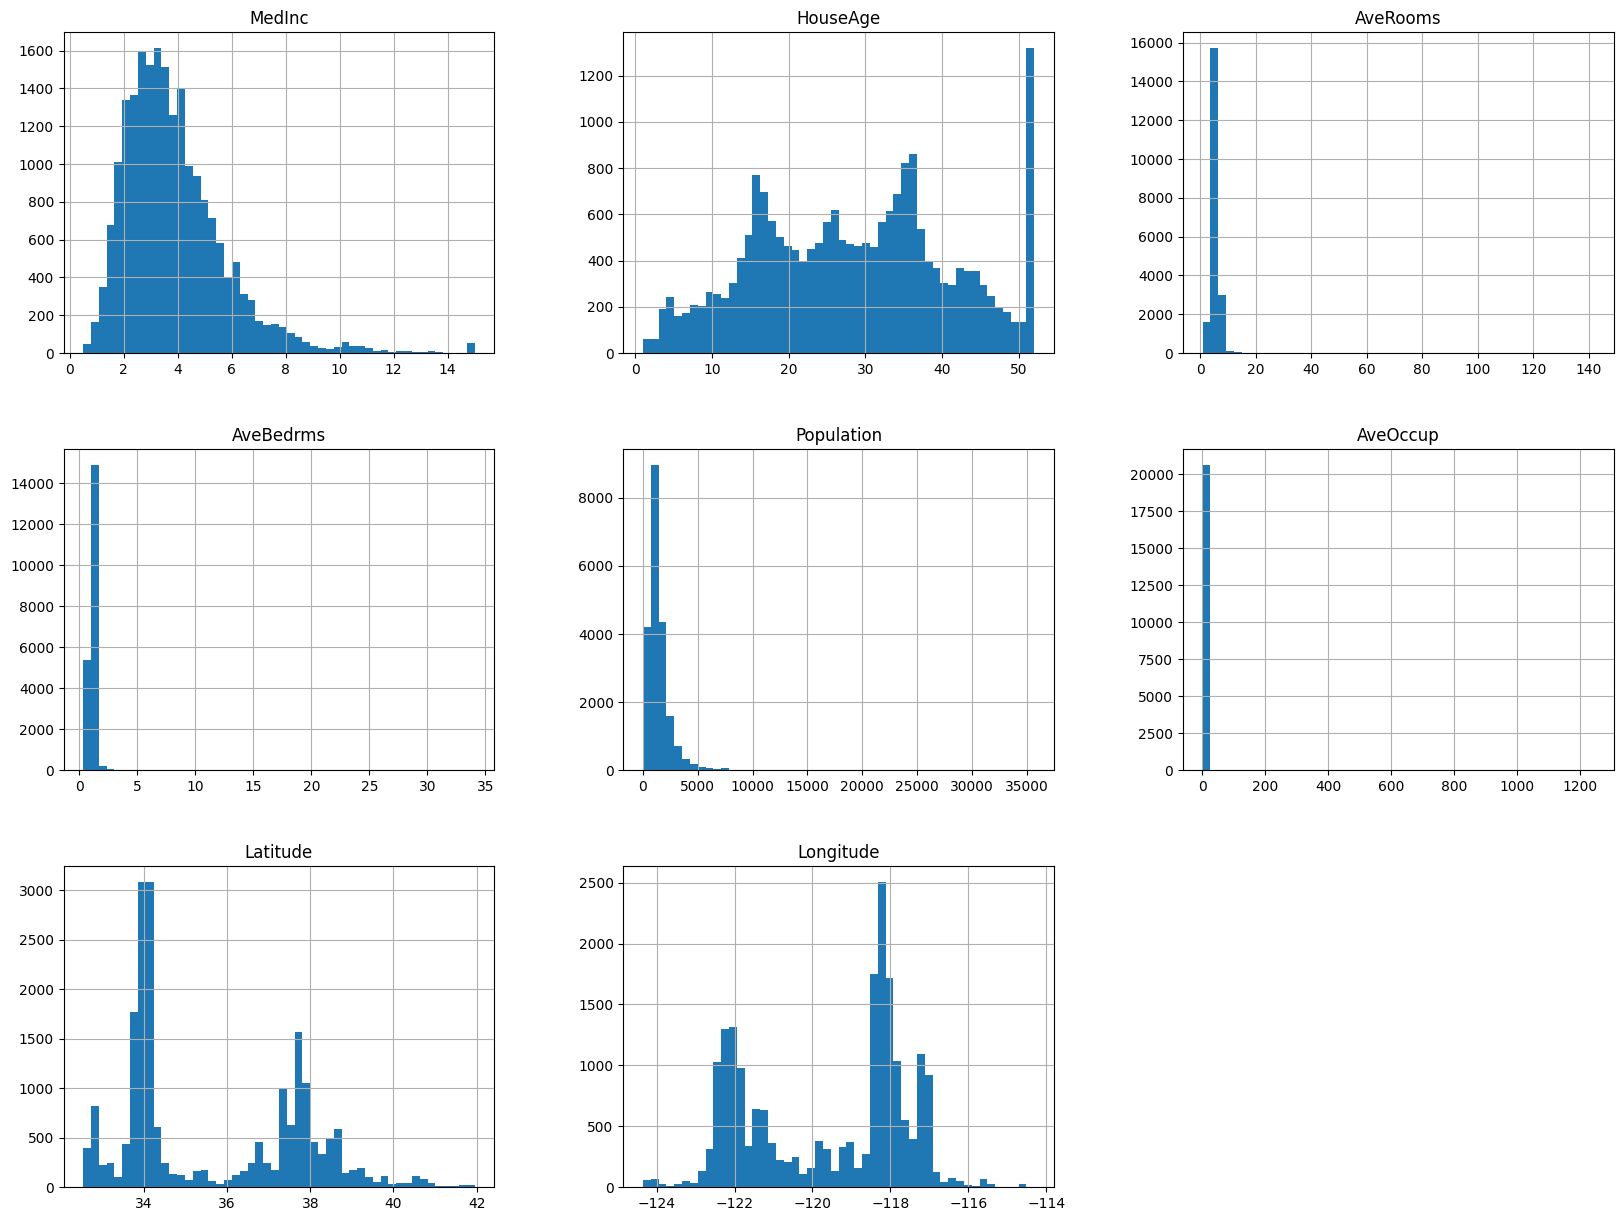

In [9]:
# Vizualizando a distribuição dos valores das informações plotando os histogramas com o mathplotlib.

%matplotlib inline
import matplotlib.pyplot as plt
california_df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# configurando os diretorios onde sera importando e salvo o mapa do estado da california para a geração do grafico.

import os
import tarfile
import urllib.request

# Configurações para salvar imagens
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [11]:
# Download do mapa da Califórnia
import os
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
     

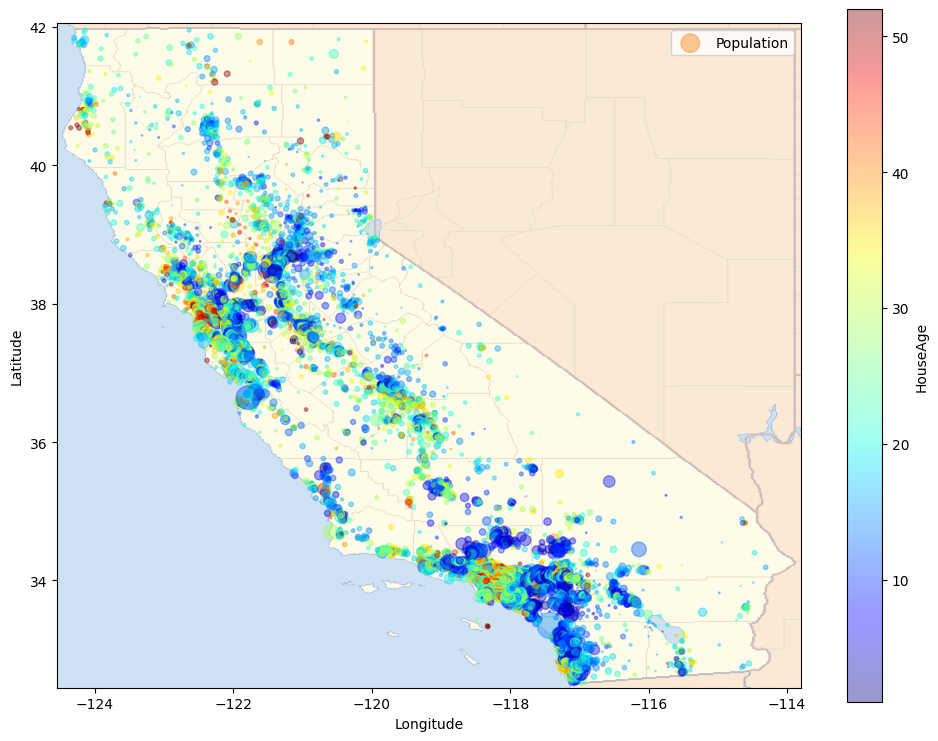

In [12]:
# Gerando o mapa e o grafico de caracteristicas do dataset, com as 20.000 resisdências localizadas e seus respectivas caracteriscas, como: idade
# das casas analisadas, populações locais etc.

california_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=california_df["Population"]/100, label="Population", figsize=(12,9),
             c="HouseAge", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.legend()

# Execução sem Pipeline.

Preparação e treinamento do modelo de regressão.

In [13]:
#Normalização dos dados
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
pd.DataFrame(X_train_scaled, columns = dataset.feature_names).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04
mean,-7.963115e-15,1.244237e-16,6.890022e-16,-9.095222e-15,-3.688449e-17,-9.599802e-16,6.862482e-15,-3.420982e-13
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.786684e+00,-2.185403e+00,-1.730839e+00,-1.476273e+00,-1.248287e+00,-1.738079e-01,-1.449526e+00,-2.383653e+00
25%,-6.900535e-01,-8.408834e-01,-3.777552e-01,-1.783150e-01,-5.594493e-01,-5.601324e-02,-7.992304e-01,-1.110184e+00
50%,-1.738502e-01,2.910018e-02,-7.538267e-02,-9.536480e-02,-2.269067e-01,-2.468958e-02,-6.448436e-01,5.328412e-01
75%,4.623492e-01,6.618155e-01,2.334413e-01,2.218914e-03,2.657490e-01,1.274114e-02,9.738786e-01,7.825410e-01
max,5.896990e+00,1.848157e+00,5.142899e+01,6.362630e+01,3.013740e+01,1.001858e+02,2.952837e+00,2.540428e+00


In [15]:
#Criação do modelo
#n_neighbors definida arbitrariamente
#Na prática deve ser feita sintonização de hiperparâmetro para escolha do valor
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

#Treinamento do modelo
model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

Aplicação do modelo para produção

In [16]:
#Predições do conjunto de teste
predict = model.predict(X_test_scaled)
print(predict)

[1.59204194 1.40200231 1.75442776 ... 1.53795195 1.75707134 1.71956083]


In [17]:
# predição da media dos valores de cada casa analisada.

predict

array([1.59204194, 1.40200231, 1.75442776, ..., 1.53795195, 1.75707134,
       1.71956083])

In [18]:
# quantidade de dados (casas) analisadas.

len(predict)

6192

# Execução Simplificada com Pipeline

Preparação das Etapas do Pipeline

In [19]:
# importando a biblioteca de pipeline

from sklearn.pipeline import Pipeline

In [20]:
# criando o objeto (pipeline)

pipe = Pipeline([
    ('scaler', StandardScaler()), #Normalização
    ('model', KNeighborsRegressor(n_neighbors= 20, weights= 'distance')) #Regressor
])

In [21]:
#Pipeline completo (transformação e treinamento) resumido.
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

Execução do Pipeline

In [22]:
# Predição com o pipeline
y_pred = pipe.predict(X_test)

In [23]:
# Resultado dos valores medios de cada casa analisada.
y_pred

array([1.51871325, 1.47251286, 1.80085517, ..., 1.64229427, 1.78930262,
       1.67442378])